# Customer Service Request Analysis

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the dataset
customer_dataframe = pd.read_csv("D:\\Data Science\\Simplilearn\\New folder\\311_Service_Requests_from_2010_to_Present.csv")

C:\Users\Debidutta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#view the first 5 observations
customer_dataframe.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
#explore the dataset
customer_dataframe.describe

<bound method NDFrame.describe of         Unique Key            Created Date             Closed Date Agency  \
0         32310363  12/31/2015 11:59:45 PM           01-01-16 0:55   NYPD   
1         32309934  12/31/2015 11:59:44 PM           01-01-16 1:26   NYPD   
2         32309159  12/31/2015 11:59:29 PM           01-01-16 4:51   NYPD   
3         32305098  12/31/2015 11:57:46 PM           01-01-16 7:43   NYPD   
4         32306529  12/31/2015 11:56:58 PM           01-01-16 3:24   NYPD   
...            ...                     ...                     ...    ...   
300693    30281872  03/29/2015 12:33:41 AM                     NaN   NYPD   
300694    30281230  03/29/2015 12:33:28 AM  03/29/2015 02:33:59 AM   NYPD   
300695    30283424  03/29/2015 12:33:03 AM  03/29/2015 03:40:20 AM   NYPD   
300696    30280004  03/29/2015 12:33:02 AM  03/29/2015 04:38:35 AM   NYPD   
300697    30281825  03/29/2015 12:33:01 AM  03/29/2015 04:41:50 AM   NYPD   

                            Agency Name  

In [5]:
customer_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [6]:
#convert the columns created date and closed date to pandas datetime format
customer_dataframe["Created Date"] = pd.to_datetime(customer_dataframe['Created Date'])
customer_dataframe["Closed Date"] = pd.to_datetime(customer_dataframe['Closed Date'])
customer_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

In [7]:
#create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing
customer_dataframe['Request_Closing_Time'] = customer_dataframe['Closed Date'] - customer_dataframe['Created Date']
customer_dataframe.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02


In [8]:
#move the column Request_Closing_Time to the 3rd index
customer_dataframe.insert(3, 'Request_Closing_Time', customer_dataframe.pop('Request_Closing_Time'))
customer_dataframe.head(10)

,Unique Key,Created Date,Closed Date,Request_Closing_Time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,01:26:16,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,04:51:31,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,07:45:14,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,03:27:02,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
5,32306554,2015-12-31 23:56:30,2016-01-01 01:50:00,01:53:30,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
6,32306559,2015-12-31 23:55:32,2016-01-01 01:53:00,01:57:28,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)"
7,32307009,2015-12-31 23:54:05,2016-01-01 01:42:00,01:47:55,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)"
8,32308581,2015-12-31 23:53:58,2016-01-01 08:27:00,08:33:02,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)"
9,32308391,2015-12-31 23:53:58,2016-01-01 01:17:00,01:23:02,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"


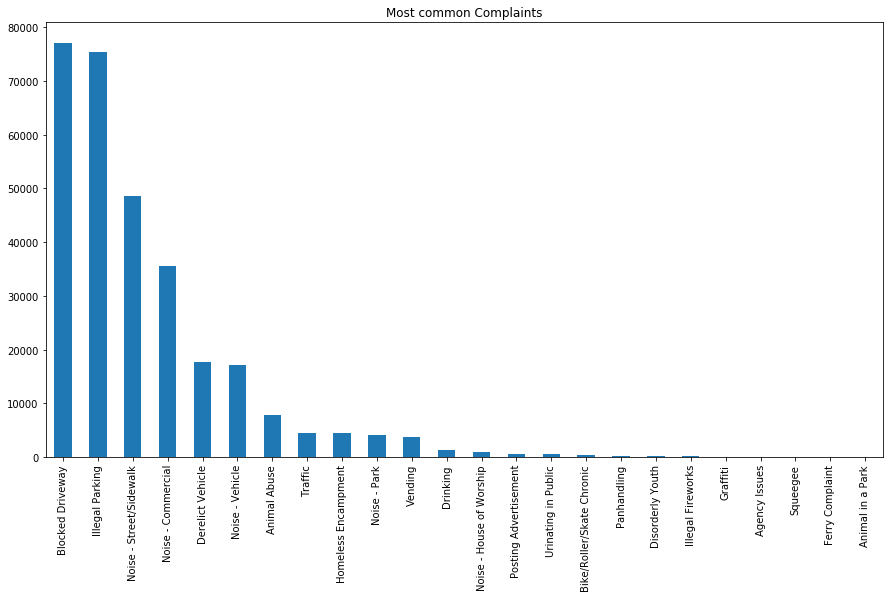

In [9]:
#Provide major insights/patterns that you can offer in a visual format (graphs or tables); 
#at least 4 major conclusions that you can come up with after generic data mining

#insight 1
#The most received complaint type
(customer_dataframe['Complaint Type'].value_counts()).plot(kind='bar',
                    figsize=(15,8), title = 'Most common Complaints')

#### Insight 1

So most of the people call 311 to complain about Blocked Driveway, followed by Illegal Parking and so on.

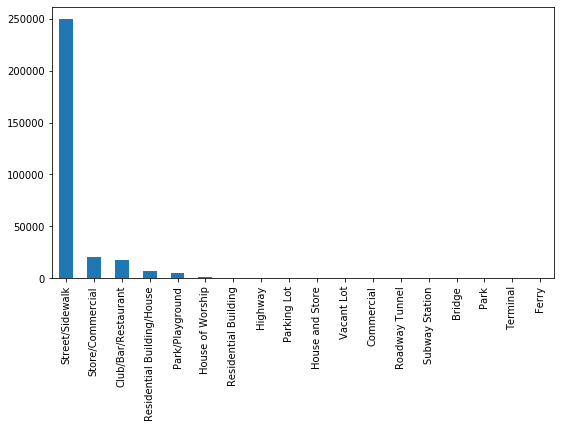

In [10]:
(customer_dataframe['Location Type'].value_counts()).plot(kind='bar',
                    figsize=(9,5), title = '')

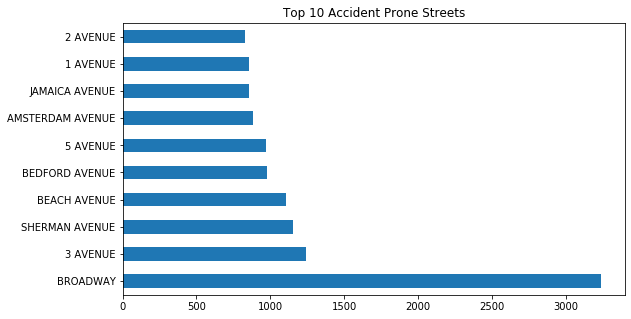

In [11]:
(customer_dataframe['Street Name'].value_counts().head(10)).plot(kind='barh',
                    figsize=(9,5), title = 'Top 10 Accident Prone Streets')

#### Insight 2

Broadway witnesses the most accidents

In [12]:
#Categorise the complaint service time based on the data of Request_Closing_Time
#Below 2 hours - Fast, 
#Between 2 to 4 hours - Acceptable, 
#Between 4 to 6 - Slow, 
#More than 6 hours - Very Slow

customer_dataframe['Request_Closing_Time'].dtype

dtype('<m8[ns]')

In [13]:
#testing the data
customer_dataframe['Request_Closing_Time'].iloc[247].days

0

In [14]:
def toHrs(timeDel):
    days = timeDel.days
    hrs = round(timeDel.seconds/3600, 2)
    res = (days*24)+hrs
    return res

In [15]:
customer_dataframe['Request_Closing_Time'] = customer_dataframe['Request_Closing_Time'].apply(toHrs)

In [16]:
customer_dataframe['Request_Closing_Time'].head()

0    0.92
1    1.44
2    4.86
3    7.75
4    3.45
Name: Request_Closing_Time, dtype: float64

In [17]:
#making a function to categorise the Request_Closing_Time
def Response_Time(time_hrs):
    if (time_hrs < 2):
        return 'Fast'
    elif (time_hrs >2 and time_hrs < 4 ):
        return 'Average'
    elif (time_hrs >4 and time_hrs < 6 ):
        return 'Slow'
    else:
        return 'Very Slow'

In [18]:
#creating a new column Response_time_category to store the categories of Request_Closing_Time
customer_dataframe['Response_time_category'] = customer_dataframe['Request_Closing_Time'].apply(Response_Time)

In [19]:
customer_dataframe['Response_time_category'].head(10)

0         Fast
1         Fast
2         Slow
3    Very Slow
4      Average
5         Fast
6         Fast
7         Fast
8    Very Slow
9         Fast
Name: Response_time_category, dtype: object

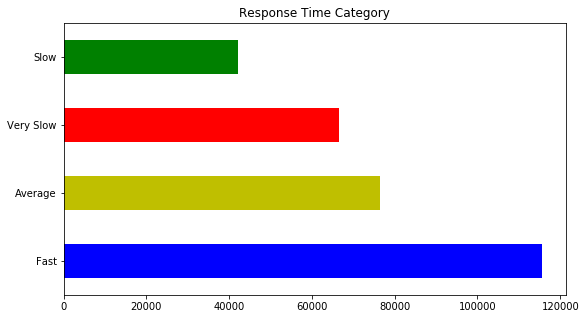

In [20]:
(customer_dataframe['Response_time_category'].value_counts()).plot(kind='barh',figsize=(9,5), color=list('byrg'), title = 'Response Time Category')


In [21]:
customer_dataframe['Response_time_category'].value_counts()

Fast         115550
Average       76539
Very Slow     66557
Slow          42052
Name: Response_time_category, dtype: int64

#### Insight 3

So, it is seen that the NYC is able to sove most of the received complaints within 2 hours

In [22]:
#Finding on which months most complaints were received
customer_dataframe['Created Date'].dtype

dtype('<M8[ns]')

In [23]:
#testing the data
customer_dataframe['Created Date'].iloc[247].month

12

In [24]:
#a function to return month name from the month number
monthName = pd.Series({1:'Jan', 2:'Feb',3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                      7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
def getMonth(timeDel):
    month = timeDel.month
    return monthName[month]

In [25]:
#testing the function
print(getMonth(customer_dataframe['Created Date'].iloc[247]))

Dec


In [26]:
#applying the function to the entire column and storing the values in a new column Created_Month
customer_dataframe['Created_Month'] = customer_dataframe['Created Date'].apply(getMonth)
customer_dataframe['Created_Month'].head()

0    Dec
1    Dec
2    Dec
3    Dec
4    Dec
Name: Created_Month, dtype: object

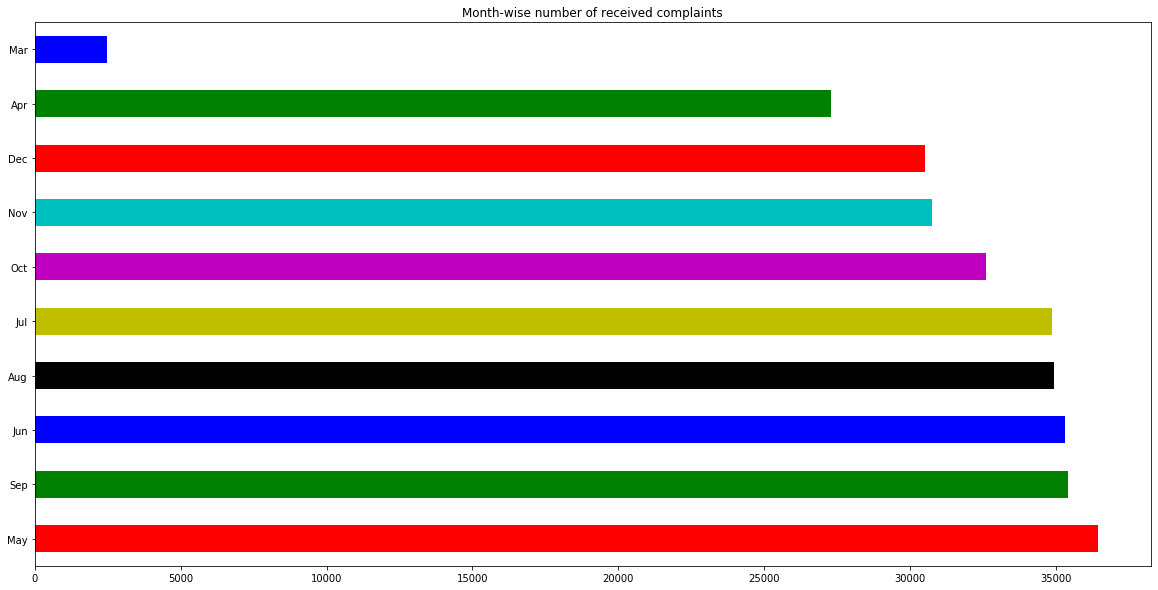

In [27]:
(customer_dataframe['Created_Month'].value_counts()).plot(kind='barh', figsize=(20,10), color=list('rgbkymc'), title = 'Month-wise number of received complaints')

#### Insight 4

The month of May has received the highest number of complaints according to this database in the year 2015

In [28]:
#Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
#grouping the data city wise
customer_dataframe['City'].head()

0    NEW YORK
1     ASTORIA
2       BRONX
3       BRONX
4    ELMHURST
Name: City, dtype: object

In [29]:
#checking null values
customer_dataframe['City'].isnull().sum()

2614

In [30]:
customer_dataframe['City'].fillna('Not Available')

0              NEW YORK
1               ASTORIA
2                 BRONX
3                 BRONX
4              ELMHURST
              ...      
300693    Not Available
300694    RICHMOND HILL
300695         BROOKLYN
300696            BRONX
300697         NEW YORK
Name: City, Length: 300698, dtype: object

In [31]:
#grouping the dataom
df_grouped_data = customer_dataframe[['City', 'Complaint Type','Request_Closing_Time']].groupby(['City', 'Complaint Type']).mean()

In [32]:
df_grouped_data

Request_Closing_Time
City     Complaint Type                               
ARVERNE  Animal Abuse                         2.153158
         Blocked Driveway                     2.526000
         Derelict Vehicle                     2.968889
         Disorderly Youth                     3.595000
         Drinking                             0.240000
...                                                ...
Woodside Blocked Driveway                     6.405455
         Derelict Vehicle                     4.965000
         Illegal Parking                      5.219500
         Noise - Commercial                   2.390000
         Noise - Street/Sidewalk              3.410000

[764 rows x 1 columns]

In [33]:
#Perform a statistical test for the following:
#Please note: For the below statements you need to state the Null and Alternate
#and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’

#Whether the average response time across complaint types is similar or not (overall)
#Are the type of complaint or service requested and location related?

In [34]:
import scipy.stats as stats
from math import sqrt

In [35]:
#Performing ANOVA test for the first one

# H0 : All Complaint Type average response time is similar
# H1 : Not similar

customer_dataframe['Complaint Type'].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [36]:
top5_complaints_type = customer_dataframe['Complaint Type'].value_counts()[:5]
top5_complaints_type

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Name: Complaint Type, dtype: int64

In [37]:
top5_complaints_type_names = top5_complaints_type.index
top5_complaints_type_names

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [38]:
complaint_wise_response_time = customer_dataframe[['Complaint Type', 'Request_Closing_Time']].groupby(['Complaint Type']).mean()
complaint_wise_response_time

,Request_Closing_Time
Complaint Type,
Agency Issues,5.258333
Animal Abuse,5.213240
Animal in a Park,336.830000
Bike/Roller/Skate Chronic,3.766486
Blocked Driveway,4.740904
Derelict Vehicle,7.364152
Disorderly Youth,3.558846
Drinking,3.861859
Ferry Complaint,NaN


In [39]:
customer_dataframe[customer_dataframe['Complaint Type'] == 'Ferry Complaint']

,Unique Key,Created Date,Closed Date,Request_Closing_Time,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Response_time_category,Created_Month
161610,31227876,2015-08-03 08:28:00,NaT,NaN,NYPD,New York City Police Department,Ferry Complaint,Homeless Issue,Terminal,NaN,...,NaN,NaN,NaN,NaN,St. George Terminal (Staten Island),NaN,NaN,NaN,Very Slow,Aug
192974,31015799,2015-07-06 09:12:00,NaT,NaN,NYPD,New York City Police Department,Ferry Complaint,Disruptive Passenger,Ferry,NaN,...,NaN,NaN,NaN,Manhattan Bound,Barberi,NaN,NaN,NaN,Very Slow,Jul


In [40]:
complaint_wise_response_time.dropna(inplace =True)
complaint_wise_response_time

,Request_Closing_Time
Complaint Type,
Agency Issues,5.258333
Animal Abuse,5.213240
Animal in a Park,336.830000
Bike/Roller/Skate Chronic,3.766486
Blocked Driveway,4.740904
Derelict Vehicle,7.364152
Disorderly Youth,3.558846
Drinking,3.861859
Graffiti,7.151062


In [41]:
sample_data = customer_dataframe.loc[customer_dataframe['Complaint Type'].isin(top5_complaints_type_names), ['Complaint Type', 'Request_Closing_Time']]
sample_data

,Complaint Type,Request_Closing_Time
0,Noise - Street/Sidewalk,0.92
1,Blocked Driveway,1.44
2,Blocked Driveway,4.86
3,Illegal Parking,7.75
4,Illegal Parking,3.45
...,...,...
300693,Noise - Commercial,NaN
300694,Blocked Driveway,2.01
300695,Noise - Commercial,3.12
300696,Noise - Commercial,4.09


In [42]:
sample_data.isnull().sum()

Complaint Type             0
Request_Closing_Time    2059
dtype: int64

In [43]:
sample_data.dropna(how='any', inplace=True)
sample_data.isnull().sum()

Complaint Type          0
Request_Closing_Time    0
dtype: int64

In [44]:
sample_data.shape

(252253, 2)

In [45]:
s1 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[0]].Request_Closing_Time
s2 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[1]].Request_Closing_Time
s3 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[2]].Request_Closing_Time
s4 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[3]].Request_Closing_Time
s5 = sample_data[sample_data['Complaint Type'] == top5_complaints_type_names[4]].Request_Closing_Time
s1.head()

1     1.44
2     4.86
7     1.80
9     1.38
10    7.80
Name: Request_Closing_Time, dtype: float64

In [46]:
print(s1.isnull().sum())
print(s2.isnull().sum())
print(s3.isnull().sum())
print(s4.isnull().sum())
print(s5.isnull().sum())

0
0
0
0
0


In [47]:
stats.f_oneway(s1, s2, s3, s4, s5)

F_onewayResult(statistic=1799.598683238952, pvalue=0.0)

We can see pvalue is less than 0.05 so we reject null hypothesis and so all complaint types average response time is not similar.

In [48]:
# Trying ChiSquare Test for second one :- 
#Are the type of complaint or service requested and location related?

# H0 : 2 categories - Complain Type and Location is independent means not related
# Ha : 2 categories - Complain Type and Location is dependent means related

In [49]:
top5_location = customer_dataframe['City'].value_counts()[:5]
top5_location

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
Name: City, dtype: int64

In [50]:
top5_location_names = top5_location.index
top5_location_names

Index(['BROOKLYN', 'NEW YORK', 'BRONX', 'STATEN ISLAND', 'JAMAICA'], dtype='object')

In [51]:
sample_data_location_c_type = customer_dataframe.loc[(customer_dataframe['Complaint Type'].isin(top5_complaints_type_names)) & (customer_dataframe['City'].isin(top5_location_names)), ['Complaint Type', 'City']]
sample_data_location_c_type.head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK


In [52]:
ch2, p_value, df, exp_frq = stats.chi2_contingency(pd.crosstab(sample_data_location_c_type['Complaint Type'], sample_data_location_c_type['City']))

In [53]:
print(ch2)
print(p_value)

40522.79928349593
0.0


We can see that the pvalue is less than 0.05, so we reject the null hypothesis. That means the complaint type and location are not independent.

#### THE END! THANK YOU!